# CPA 01 Zachary Boroda 
## Analyzing Electricty Generation Data 

#### Data source: https://www.eia.gov/electricity/data/state/annual_generation_state.xls 

This is a data set that for each state every year over the past 30 years shows the Megawatthours of electricity produced seperated by source. The sources are listed by type of energy and type of producer, but I will be focusing on the 'Total Electric Power Industry' numbers.

I converted this data to a CSV file 

### Two questions to answer: 

1) Which state produces the most clean energy in 2020? How about in 1990? Has this state changed? 

2) Which state is the most improved? ie. had the greatest increase in renewable enegery production


In [1]:
import pandas as pd
import numpy as np
filename = 'annual_generation_state.xlsx - Net_Generation_1990-2020 Final.csv'

In [2]:
electric_data = pd.read_csv(filename, index_col = 'YEAR')
electric_data['GENERATION (Megawatthours)'] = pd.to_numeric(electric_data['GENERATION (Megawatthours)'].str.replace(',','', regex = False))
electric_data = electric_data[electric_data.STATE != '  ']
electric_data

,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
YEAR,,,,
1990,AK,Total Electric Power Industry,Total,5599506
1990,AK,Total Electric Power Industry,Coal,510573
1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521
1990,AK,Total Electric Power Industry,Natural Gas,3466261
1990,AK,Total Electric Power Industry,Petroleum,497116
...,...,...,...,...
2020,WY,"Electric Generators, Electric Utilities",Coal,32361811
2020,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,1075863
2020,WY,"Electric Generators, Electric Utilities",Natural Gas,647464


In [3]:
print(electric_data['TYPE OF PRODUCER'].sort_values().unique())

['Combined Heat and Power, Commercial Power'
 'Combined Heat and Power, Electric Power'
 'Combined Heat and Power, Industrial Power'
 'Electric Generators, Electric Utilities'
 'Electric Generators, Independent Power Producers'
 'Total Electric Power Industry']


In [4]:
print(electric_data['ENERGY SOURCE'].sort_values().unique())

['Coal' 'Geothermal' 'Hydroelectric Conventional' 'Natural Gas' 'Nuclear'
 'Other' 'Other Biomass' 'Other Gases' 'Petroleum' 'Pumped Storage'
 'Solar Thermal and Photovoltaic' 'Total' 'Wind'
 'Wood and Wood Derived Fuels']


In [5]:
print(electric_data['STATE'].sort_values().unique())
electric_data['STATE'] = electric_data['STATE'].str.replace('US-Total','US-TOTAL', regex = False)
# electric_data[electric_data['STATE'] == 'US-TOTAL']
print(electric_data['STATE'].sort_values().unique())

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'US-TOTAL' 'US-Total' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'US-TOTAL' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


In [6]:
electric_data.describe()

,GENERATION (Megawatthours)
count,5.588200e+04
mean,1.686078e+07
std,1.305524e+08
min,-8.823445e+06
25%,2.627000e+04
50%,3.231285e+05
75%,3.389417e+06
max,4.178277e+09


Let us plot US-TOTAL electrcity by source. 

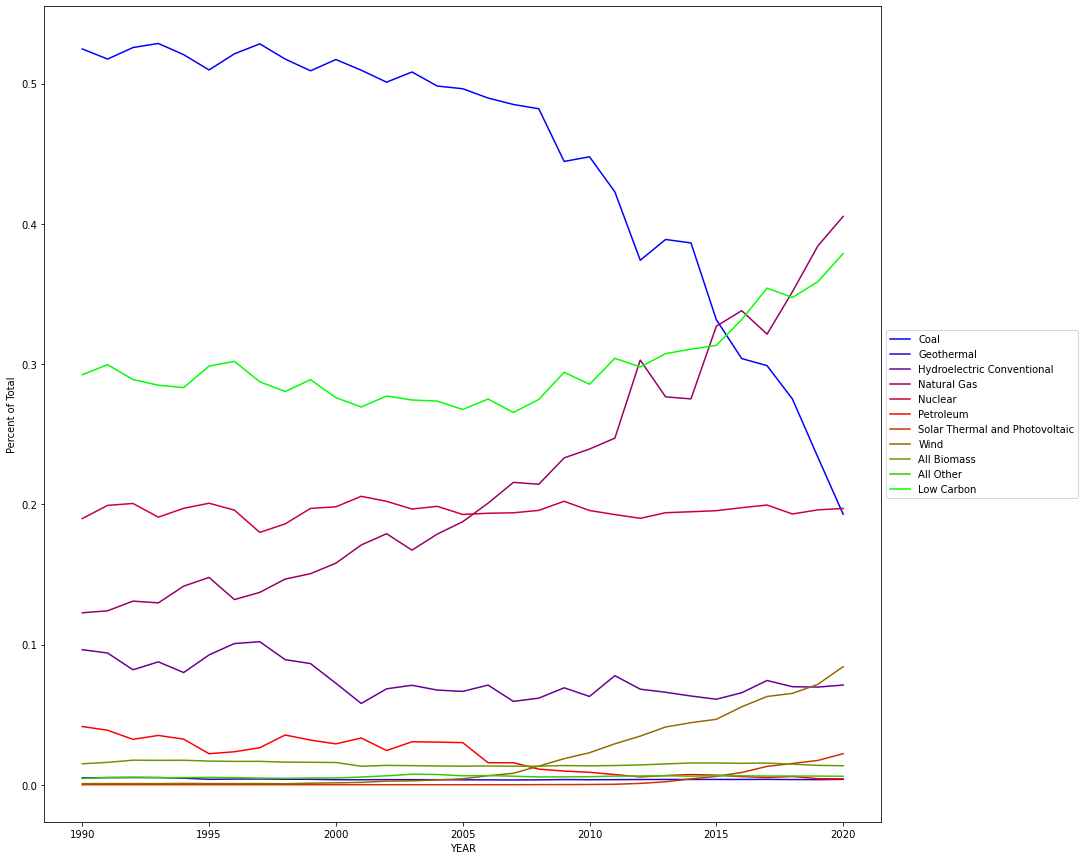

In [54]:
ustotal = electric_data[(electric_data['STATE'] == 'US-TOTAL') & (electric_data['TYPE OF PRODUCER'] == 'Total Electric Power Industry')]
ustotal = pd.pivot_table(ustotal, values='GENERATION (Megawatthours)', columns=['ENERGY SOURCE'], index='YEAR', fill_value=0)
ustotal = ustotal.drop('Total',axis=1).div(ustotal['Total'], axis=0)
ustotal['All Biomass'] = ustotal['Wood and Wood Derived Fuels'] + ustotal['Other Biomass']
ustotal['All Other'] = ustotal['Other'] + ustotal['Other Gases']
ustotal = ustotal.drop(['Wood and Wood Derived Fuels', 'Other Biomass', 'Other Gases', 'Other', 'Pumped Storage'],axis=1)
ustotal['Low Carbon'] = ustotal['Geothermal'] + ustotal['Nuclear'] + ustotal['Solar Thermal and Photovoltaic'] + ustotal['Wind'] + ustotal['Hydroelectric Conventional'] 
#ustotal['Solar and Wind'] = ustotal['Solar Thermal and Photovoltaic'] + ustotal['Wind']
ustotal.plot(kind='line', figsize=(15,15), colormap='brg', ylabel='Percent of Total Electricity', title='U').legend(loc='center left', bbox_to_anchor=(1.0,0.5))
#ustotal

This shows how the prevalence of coal for electricty generation has steadily declined over the past 30 years. It also shows the growth of renewables and natural gas. It really makes me hopeful about the climate that Low Carbon sources of electricity generation such as Nuclear, Solar, Geothermal, and Wind have become such a large part of the energy generation landscape. 

In [7]:
#electric_data_pivot_table = pd.pivot_table(electric_data, values='GENERATION (Megawatthours)', index=['STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE'], columns=['YEAR'], fill_value=0)
#electric_data_pivot_table

YEAR                                                                                1990  \
STATE TYPE OF PRODUCER                          ENERGY SOURCE                              
AK    Combined Heat and Power, Commercial Power Coal                              198613   
                                                Hydroelectric Conventional             0   
                                                Natural Gas                            0   
                                                Other Biomass                          0   
                                                Petroleum                          66920   
...                                                                                  ...   
WY    Total Electric Power Industry             Petroleum                          49205   
                                                Solar Thermal and Photovoltaic         0   
                                                Total                           39974965   
                                                Wind                                   0   
                                                Wood and Wood Derived Fuels        50440   

YEAR                                                                                1991  \
STATE TYPE OF PRODUCER                          ENERGY SOURCE                              
AK    Combined Heat and Power, Commercial Power Coal                              194600   
                                                Hydroelectric Conventional             0   
                                                Natural Gas                         8478   
                                                Other Biomass                          0   
                                                Petroleum                           1460   
...                                                                                  ...   
WY    Total Electric Power Industry             Petroleum                          61417   
                                                Solar Thermal and Photovoltaic         0   
                                                Total                           39298388   
                                                Wind                                   0   
                                                Wood and Wood Derived Fuels        50440   

YEAR                                                                                1992  \
STATE TYPE OF PRODUCER                          ENERGY SOURCE                              
AK    Combined Heat and Power, Commercial Power Coal                              206266   
                                                Hydroelectric Conventional             0   
                                                Natural Gas                         8478   
                                                Other Biomass                          0   
                                                Petroleum                           1515   
...                                                                                  ...   
WY    Total Electric Power Industry             Petroleum                          58483   
                                                Solar Thermal and Photovoltaic         0   
                                                Total                           42473894   
                                                Wind                                   0   
                                                Wood and Wood Derived Fuels         3692   

YEAR                                                                                1993  \
STATE TYPE OF PRODUCER                          ENERGY SOURCE                              
AK    Combined Heat and Power, Commercial Power Coal                              210559   
                                                Hydroelectric Conventional             0   
                                         